In [2]:
##
##Script to get List of categories available in Yelp that list restraurants in ranking
##
import pandas as pd
import numpy as np
#for creating geo coordinate combinations
import itertools  as it
from yelpapi import YelpAPI
import requests     # how python goes onto the internet!
import re           # regex
from bs4 import BeautifulSoup # a python HTML parser (version 3)
from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
%matplotlib inline

In [3]:
#https://www.yelp.com/developers/v2/manage_api_keys refresh to generate new keys
api_key = 'SD5ybcet2QSwWXz2N7M5lw'
api_secret = 'EJBXJBAFgEka0br1ynT6HwWJVT8'
access_token = 'EESADq5kSfBL4XkbxzwJxsqhZIgQHbJs'
access_secret = 'JMU-eh8i0eVUUYxJcjelLkZEfTY'

In [4]:
#activate yelpapi with personal keys
yelp_api = YelpAPI(api_key, api_secret, access_token, access_secret)

In [156]:
## Create a method to grab yelp business with a keyword in a lat-long bound
def getbiz(term, nw_latitude, nw_longitude,se_latitude, se_longitude):
    #Create the first base dataframe
    bounds = str(se_latitude)+','+str(se_longitude)+'|'+str(nw_latitude)+','+str(nw_longitude)
    search_results_dict = yelp_api.search_query(term= term, bounds=bounds)
    search_results_df = json_normalize(search_results['businesses'])

#Run for increments of 20 to offset results
    offset = 20
    while offset<= 1000:
        temp_dict = yelp_api.search_query(term= term, bounds=bounds, offset=offset)
        [n['id'] for n in search_results_dict['businesses']]
        temp_df = json_normalize(temp_dict['businesses'])
        search_results_df = search_results_df.append(temp_df)
        print offset
        offset += 20
        if temp_df.shape[0] < 20:
            print 'Done at offset '+str(offset)
            break


In [200]:

#Specify the keyword to search
term = 'bar'

#Specify the lat lon to specify bounds
nw_latitude=37.804409
nw_longitude=-122.459609
se_latitude=37.750485
se_longitude=-122.377589
#nw_latitude=37.707704 #37.807244
#nw_longitude=-122.356823 #-122.446011
#se_latitude=37.803084 #37.783661
#se_longitude=-122.519216 #-122.385667

#call getbiz() in given range
getbiz(term, nw_latitude, nw_longitude,se_latitude, se_longitude)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980


YelpAPIError: (u'INVALID_PARAMETER', 'One or more parameters are invalid in request [field=offset]')

In [201]:
#def getbizinfo(businessID)
#business_detail = yelp_api.business_query(id=businessID)
#json_normalize(business_detail)

###########Sinan's code###########
#[n['id'] for n in search_results_dict['businesses']]
###########
search_results_df.shape
search_results_df.to_csv('../data/yelp_east.csv',encoding='utf-8')

In [164]:
NorthBeach = search_results_df

In [203]:
NorthBeach = pd.read_csv('./data/yelp_northbeach.csv', parse_dates=True)
#East = pd.read_csv('./data/yelp_east.csv', parse_dates=True)

IOError: File ./data/yelp_northbeach.csv does not exist

In [ ]:
Northbeach.columns

In [184]:
#Replace dots in column names to underscore
NorthBeach.columns = [i.replace('.','_').lower() for i in NorthBeach.columns]


NameError: name 'plt' is not defined

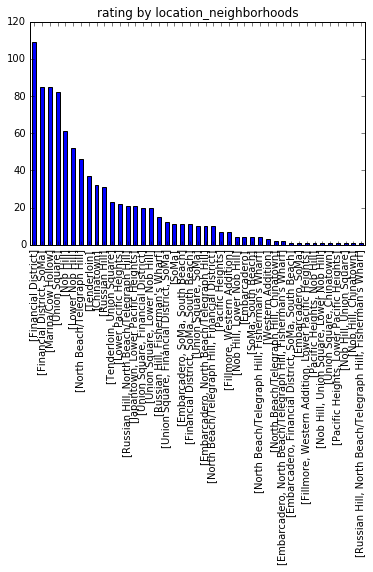

In [182]:
cols = ['location_neighborhoods', 'rating']
NorthBeach.location_neighborhoods.value_counts().plot(kind='bar', title='rating by location_neighborhoods')
plt.xlabel('location_neighborhoods')
plt.ylabel('rating')